In [ ]:
import os
from google.colab import drive
import cv2 as cv
from PIL import Image
import pywt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Image to oncatinated vector for each class to do SVC

In [ ]:
def image_to_vector(folder_path, class_label,limit_data_count):
  vector = np.array([])
  i = 0
  class_item_count = 0
  for filename in os.listdir(folder_path):
     if class_item_count >= limit_data_count:
        break
     if filename.endswith(".jpeg"):
       if i == 0:
          vector = cv.imread(folder_path + filename,0)
          vector = np.array(cv.resize(vector, (300,300), interpolation = cv.INTER_CUBIC)).flatten()
          i+=1
          class_item_count+=1
       else:
          img = cv.imread(folder_path + filename,0)
          img = np.array(cv.resize(img, (300,300), interpolation = cv.INTER_CUBIC)).flatten()
          vector = np.vstack([vector, np.array(img)])
          class_item_count+=1
  y = np.ones(len(vector))*class_label
  return vector, y

Function to iterate over every class an vectorify the images, it will eventually return just 2 vectors X nd y

In [ ]:
def image_to_vector_each_class(folder_path,limit_data_count):
  i = 0
  for class_label in range(5):
    current_class_folder_path = folder_path + "/" + str(class_label) + "/"
    if class_label == 0:
        X,y = image_to_vector(current_class_folder_path, class_label,limit_data_count)
    else:
        curr_X, curr_y = image_to_vector(current_class_folder_path, class_label,limit_data_count)
        X = np.vstack([X, curr_X])
        # print(X.shape)
        y = np.hstack([y, curr_y])
  return X, y

In [ ]:
preprocessed_folder_path = "/content/drive/MyDrive/ML Project/Diabetic Retinopathy/Fungus of Retina/processed"
X, y = image_to_vector_each_class(preprocessed_folder_path, 200)

In [ ]:
X.shape

(1000, 90000)

In [ ]:
y.shape

(1000,)

## Running SVC on preprocessing attempt 1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
start = time.time()
clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
print('Singel SVC accuracy score : ', accuracy_score(y_pred,y_test))
print('Time taken: ', end - start)
proba = clf.predict_proba(X_test)
n_estimators = 10
start = time.time()
clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='poly', probability=True, class_weight='balanced'), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
print("Bagging SVC", accuracy_score(y_pred,y_test))
print('Time taken: ', end - start)
proba = clf.predict_proba(X_test)
start = time.time()
clf = RandomForestClassifier(min_samples_leaf=5)
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
print("Random Forest", accuracy_score(y_pred,y_test))
print('Time taken: ', end - start)
proba = clf.predict_proba(X_test)

Singel SVC accuracy score :  0.23333333333333334
Time taken:  1061.8165905475616
Bagging SVC 0.22727272727272727
Time taken:  136.88980102539062
Random Forest 0.24242424242424243
Time taken:  3.4491219520568848


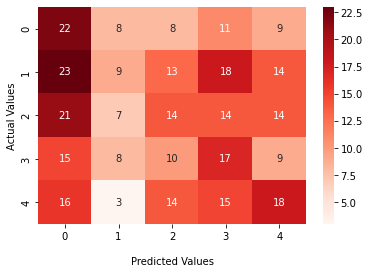

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred,)
ax = sns.heatmap(conf_matrix,annot = True,cmap="Reds")
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

# K nearest neighbours

In [ ]:
for i in range(1,15):
  n = i
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train, y_train) 
  y_pred=neigh.predict(X_test)
  print(f"KNN with {n} neighbors : ", accuracy_score(y_pred,y_test))

KNN with 1 neighbors :  0.26666666666666666
KNN with 2 neighbors :  0.23333333333333334
KNN with 3 neighbors :  0.24545454545454545
KNN with 4 neighbors :  0.2545454545454545
KNN with 5 neighbors :  0.23333333333333334
KNN with 6 neighbors :  0.25757575757575757
KNN with 7 neighbors :  0.2606060606060606
KNN with 8 neighbors :  0.23636363636363636
KNN with 9 neighbors :  0.23636363636363636
KNN with 10 neighbors :  0.23939393939393938
KNN with 11 neighbors :  0.2606060606060606
KNN with 12 neighbors :  0.24848484848484848
KNN with 13 neighbors :  0.21818181818181817
KNN with 14 neighbors :  0.2515151515151515


Plotting heat map for KNN with 11 neighbhors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train, y_train) 
y_pred=neigh.predict(X_test)

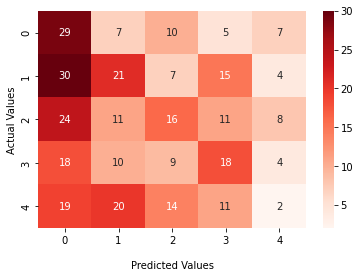

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred,)
ax = sns.heatmap(conf_matrix,annot = True,cmap="Reds")
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');